In [ ]:
library(tidyverse)
library(dtwclust)
library(ggpubr)
library(reshape2)

In [ ]:
df <- tibble()

file_head='cvi/partitional'
dists<-c('dtw_basic','dtw_lb','gak','lbi','lbk','sbd','sdtw')
for (dist in dists){ 
    file_dir = file.path(file_head, dist)
    for (file in list.files(file_dir)){
        cvi <- read_csv(file.path(file_dir,file))
        names(cvi)<-c('metric_name',3,4,5,6,7)
        cvi =gather(cvi, '3', '4', '5', '6', '7', key='cluster_num', value='metric_value')
        title_splites <-strsplit(str_sub(file, 1, -5),'_' )[[1]]
        window_size <- title_splites[[1]]
        over_lap<-title_splites[[2]]
        cvi_extend <- cvi %>% mutate(window = window_size, overlap= over_lap, dist = dist) 
        df <-bind_rows(df, cvi_extend)  
    }
}
df <- df[,c(1, 2, 4, 5, 6,3)] # reordering columns

In [94]:
write.csv(df, 'metrics_all.csv')

In [111]:
df %>% head(10)

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Sil,3,120,0.25,dtw_basic,4.806122e-01
SF,3,120,0.25,dtw_basic,0.000000e+00
CH,3,120,0.25,dtw_basic,1.466724e+04
DB,3,120,0.25,dtw_basic,5.306217e-01
DBstar,3,120,0.25,dtw_basic,5.778517e-01
D,3,120,0.25,dtw_basic,1.489758e-03
COP,3,120,0.25,dtw_basic,1.037344e-01
Sil,4,120,0.25,dtw_basic,3.869646e-01
SF,4,120,0.25,dtw_basic,0.000000e+00


In [98]:
ch_metric <- filter(df, metric_name=='CH')

In [117]:
arrange(ch_metric, desc(metric_value)) %>% head()

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CH,3,120,0.75,dtw_lb,77529.53
CH,4,120,0.75,sdtw,72280.07
CH,3,120,0.75,sdtw,72074.35
CH,3,120,0.75,gak,70734.80
CH,4,120,0.75,gak,69760.35
CH,4,120,0.75,dtw_lb,68876.89


In [103]:
sil_metric <- filter(df, metric_name=='Sil')

In [121]:
arrange(sil_metric, desc(metric_value)) %>% head()

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Sil,3,120,0.25,sdtw,0.6074067
Sil,3,150,0,sdtw,0.6035334
Sil,3,120,0.5,sdtw,0.5862608
Sil,3,120,0,sdtw,0.5798766
Sil,3,180,0.25,sdtw,0.5765881
Sil,3,120,0.75,sdtw,0.5738587


In [106]:
SF_metric <- filter(df, metric_name=='SF')
arrange(SF_metric, desc(metric_value)) %>% head()

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
SF,3,120,0.5,sbd,0.6260334
SF,3,120,0.75,sbd,0.6259911
SF,3,120,0.25,sbd,0.6259534
SF,3,120,0,sbd,0.6258639
SF,3,150,0.5,sbd,0.6246746
SF,3,150,0.25,sbd,0.6246447


In [123]:
D_metric <- filter(df, metric_name=='D')
arrange(D_metric, desc(metric_value)) %>% head()

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
D,6,180,0.25,dtw_basic,0.003716216
D,4,150,0.25,dtw_basic,0.003040541
D,4,180,0.25,dtw_basic,0.002861230
D,4,180,0,dtw_basic,0.002750688
D,7,150,0.25,dtw_basic,0.002699055
D,3,150,0,dtw_basic,0.002559181


In [109]:
DB_metric <- filter(df, metric_name=='DB')
arrange(DB_metric, metric_value) %>% head()

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
DB,3,150,0.75,sdtw,0.3014298
DB,3,120,0,sdtw,0.3106934
DB,3,150,0,sdtw,0.3124214
DB,3,120,0.25,gak,0.3147044
DB,3,120,0.5,sdtw,0.3326553
DB,3,180,0.75,sdtw,0.3351885


In [114]:
DBstar_metric <- filter(df, metric_name=='DBstar')
arrange(DBstar_metric, metric_value) %>% head(10)

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
DBstar,3,150,0,sdtw,0.3382433
DBstar,3,120,0.25,sdtw,0.4076283
DBstar,3,120,0.25,gak,0.4112436
DBstar,3,120,0,sdtw,0.4200597
DBstar,3,180,0.25,sdtw,0.4429913
DBstar,3,120,0.75,sdtw,0.4695838
DBstar,3,150,0.75,sdtw,0.4823678
DBstar,3,120,0.5,sdtw,0.5121639
DBstar,4,180,0.25,sdtw,0.5293808


In [113]:
COP_metric <- filter(df, metric_name=='COP')
arrange(COP_metric, metric_value) %>% head(10)

metric_name,cluster_num,window,overlap,dist,metric_value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
COP,7,120,0,sdtw,0.007406354
COP,7,120,0.5,sdtw,0.007492196
COP,7,150,0.75,sdtw,0.007518894
COP,7,150,0,sdtw,0.007783263
COP,7,120,0.75,sdtw,0.007892061
COP,7,150,0.25,sdtw,0.008186972
COP,6,120,0.25,sdtw,0.008501835
COP,7,180,0,sdtw,0.008615471
COP,7,150,0.5,sdtw,0.008731074


In [ ]:
cvi_all<-list()
file_head='cvi/partitional'
dists<-c('dtw_basic','dtw_lb','gak','lbi','lbk','sbd','sdtw')
for (dist in dists){
    file_dir = file.path(file_head, dist)
    cvis<-list()
    for (file in list.files(file_dir)){
      print(file)
      cvi <- read_csv(file.path(file_dir,file))

      cvi[3,2:6] <- cvi[3,2:6]/10000 # normalize CH values

      df<-melt(cvi)
      names(df) <- c('metrics', 'cluster_num', 'value')
      print(df)
      pl=
        ggplot(df, aes(cluster_num, value, group=factor(metrics)))+
        geom_line(aes(color=factor(metrics)))+
        labs(title=gsub('.csv','',file))

      cvis[[file]]<-pl
    }
    cvi_all[[dist]]<-cvis
}

In [13]:
ggarrange(plotlist=cvi_all[['dtw_lb']], ncol=2, align='hv',hjust = -1,
  vjust = 1.5)

ERROR: Error in ggarrange(plotlist = cvi_all[["dtw_lb"]], ncol = 2, align = "hv", : object 'cvi_all' not found


In [124]:
# clustering on all cases

In [2]:
df <- read_csv(file.path('./datasets2/120_0.25.csv'))

pc <- tsclust(df, type = "partitional", k = 3L:7L, 
           distance = "sdtw", centroid = "pam", 
           seed = 3247L, trace = TRUE)

Parsed with column specification:
cols(
  `0` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double()
)



	Precomputing distance matrix...



Repetition 1 for k = 3


Iteration 1: Changes / Distsum = 14648 / 713856.3
Iteration 2: Changes / Distsum = 1101 / 522888.7
Iteration 3: Changes / Distsum = 691 / 489570.8
Iteration 4: Changes / Distsum = 521 / 474207.6
Iteration 5: Changes / Distsum = 738 / 454450.5
Iteration 6: Changes / Distsum = 0 / 454450.5



Repetition 1 for k = 4


Iteration 1: Changes / Distsum = 14648 / 705642.4
Iteration 2: Changes / Distsum = 2019 / 451601.9
Iteration 3: Changes / Distsum = 716 / 417151.7
Iteration 4: Changes / Distsum = 995 / 390776.4
Iteration 5: Changes / Distsum = 912 / 374930.6
Iteration 6: Changes / Distsum = 526 / 370817.2
Iteration 7: Changes / Distsum = 426 / 368396.8
Iteration 8: Changes / Distsum = 1048 / 347987.5
Iteration 9: Changes / Distsum = 82 / 345106.7
Iteration 10: Changes / Distsum = 0 / 345106.7



Repetition 1 for k = 5


Iteration 1: Changes / Distsum = 14648 / 904168.9
Iteration 2: Changes / Distsum = 2581 / 379376.6
Iteration 3: Changes / Distsum = 1174 / 331784.4
Iteration 4: Changes / Distsum = 773 / 307487.6
Iteration 5: Changes / Distsum = 927 / 299318.1
Iteration 6: Changes / Distsum = 399 / 296707.4
Iteration 7: Changes / Distsum = 0 / 296707.4



Repetition 1 for k = 6


Iteration 1: Changes / Distsum = 14648 / 465157
Iteration 2: Changes / Distsum = 1810 / 276275.5
Iteration 3: Changes / Distsum = 1202 / 246973.2
Iteration 4: Changes / Distsum = 180 / 243460.4
Iteration 5: Changes / Distsum = 0 / 243460.4



Repetition 1 for k = 7


Iteration 1: Changes / Distsum = 14648 / 443410.5
Iteration 2: Changes / Distsum = 2367 / 250800
Iteration 3: Changes / Distsum = 680 / 240069.6
Iteration 4: Changes / Distsum = 134 / 236766.7
Iteration 5: Changes / Distsum = 392 / 234083.8
Iteration 6: Changes / Distsum = 499 / 224181.9
Iteration 7: Changes / Distsum = 0 / 224181.9

	Elapsed time is 54.593 seconds.



In [12]:
pc[[1]]

partitional clustering with 3 clusters
Using sdtw distance
Using pam centroids

Time required for analysis:
   user  system elapsed 
782.944   8.596  54.593 

Cluster sizes with average intra-cluster distance:

  size  av_dist
1 7202 25.41163
2 5198 26.97194
3 2248 58.37891

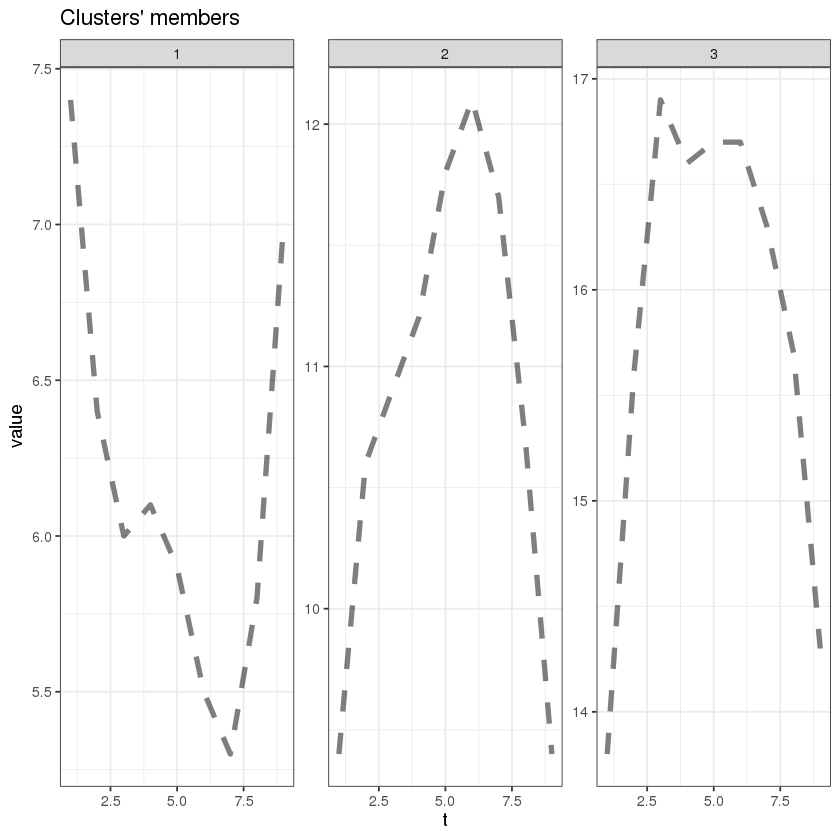

In [9]:
plot(pc[[1]], type='c')